<a href="https://colab.research.google.com/github/Ivan8Garcia/data-science/blob/main/Clasificacion_primeros_pasos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación: Primeros pasos**

En este proyecto, analizaremos datos de una campaña de marketing para la adhesión a inversiones. El objetivo es utilizar la información de los datos para predecir si los clientes de un banco invertirán su dinero o no.  

Esta predicción se realizará mediante **machine learning**, y este notebook contendrá los pasos para obtener un modelo capaz de hacer dichas predicciones, desde la **lectura**, **análisis exploratorio**, **separación** y **transformación** de los datos, hasta el **ajuste**, **evaluación** y **comparación** de modelos de clasificación.

# 1. Análisis exploratorio

## Realizando la lectura de los datos

Podemos leer los datos utilizando la biblioteca `pandas`. Por esta razón, importaremos la biblioteca con el comando `import pandas as pd`.  

Dado que el archivo de datos está en formato *csv*, realizaremos la lectura con la función [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [190]:
import pandas as pd

In [191]:
datos= pd.read_csv("/content/marketing_inversiones.csv")
datos

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos,adherencia_inversion
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si
...,...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6,si
1264,35,soltero (a),superior,no,5958,no,215,1,si
1265,30,soltero (a),superior,no,-477,si,1532,2,si
1266,42,casado (a),superior,no,2187,no,525,3,si


Para crear modelos de clasificación, necesitamos utilizar datos de calidad, sin inconsistencias y sin datos faltantes. Verificaremos si existen datos nulos y el tipo de datos de cada columna en la base de datos utilizando el método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [192]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   edad                  1268 non-null   int64 
 1   estado_civil          1268 non-null   object
 2   escolaridad           1268 non-null   object
 3   default               1268 non-null   object
 4   saldo                 1268 non-null   int64 
 5   prestatario           1268 non-null   object
 6   ultimo_contacto       1268 non-null   int64 
 7   ct_contactos          1268 non-null   int64 
 8   adherencia_inversion  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


## Explorando los datos

Una etapa muy importante en proyectos de *machine learning* es la exploración y comprensión de los datos, conocida como **análisis exploratorio**. Podemos utilizar gráficos para verificar qué información contiene cada una de las columnas de la base de datos, así como identificar inconsistencias y patrones que puedan existir.  

Exploraremos cada una de las columnas de la base de datos utilizando la biblioteca `plotly`. Comenzaremos con las variables categóricas y luego analizaremos las variables numéricas.

### Variables categóricas

In [193]:
import plotly.express as px

In [194]:
#LAS VARIABLES CATEGORICAS SON LAS QUE SE CONOCEN COMO "OBJECT" en datos.info
px.histogram(datos,x="adherencia_inversion",text_auto=True)

In [195]:
px.histogram(datos,x="estado_civil",text_auto=True,color="adherencia_inversion",barmode="group")

In [196]:
px.histogram(datos,x="escolaridad",text_auto=True,color="adherencia_inversion",barmode="group")

In [197]:
px.histogram(datos,x="default",text_auto=True,color="adherencia_inversion",barmode="group")

In [198]:
px.histogram(datos,x="prestatario",text_auto=True,color="adherencia_inversion",barmode="group")

### Variables numéricas

In [199]:
#LAS VARIABLES NUMERICAS SON LAS QUE CONOCEMOS COMO "INT64"
px.box(datos,x="edad",color="adherencia_inversion")

In [200]:
px.box(datos,x="saldo",color="adherencia_inversion")

In [201]:
px.box(datos,x="ultimo_contacto",color="adherencia_inversion")

In [202]:
px.box(datos,x="ct_contactos",color="adherencia_inversion")

# 2. Tranformación de los datos

## Variables explicativas y variable de respuesta

Para realizar la predicción de los valores con un modelo de aprendizaje automático, necesitamos separar la variable objetivo de las variables explicativas. La variable **y** representa lo que queremos predecir, mientras que **x** incluye todas las variables que se utilizarán para explicar el comportamiento de **y**.

In [203]:
#aqui estamos separando las variables explicativas(X) y la variable respuesta (Y), en el eje 1 que es de las columnas
X=datos.drop("adherencia_inversion",axis=1)
y=datos["adherencia_inversion"]

In [204]:
#visualizo X para ver que se haya quitado la columna ADHRENCIA_INVERSION
X

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos
0,45,casado (a),superior,no,242,no,587,1
1,42,casado (a),secundaria,no,1289,no,250,4
2,23,soltero (a),superior,no,363,no,16,18
3,58,divorciado (a),superior,no,1382,no,700,1
4,50,casado (a),secundaria,no,3357,no,239,4
...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6
1264,35,soltero (a),superior,no,5958,no,215,1
1265,30,soltero (a),superior,no,-477,si,1532,2
1266,42,casado (a),superior,no,2187,no,525,3


In [205]:
#visualizo Y para ver que se encuentre solamente la columna ADHRENCIA_INVERSION
y

,adherencia_inversion
0,si
1,si
2,no
3,si
4,si
...,...
1263,si
1264,si
1265,si
1266,si


## Transformando las variables explicativas

Los algoritmos de aprendizaje automático no comprenden datos en formato de texto, por lo que debemos transformar los datos a un formato numérico para que el algoritmo pueda interpretar la información. Esta transformación debe realizarse de manera que no altere la información original del conjunto de datos, por lo que no basta con simplemente cambiar los valores a números aleatorios.

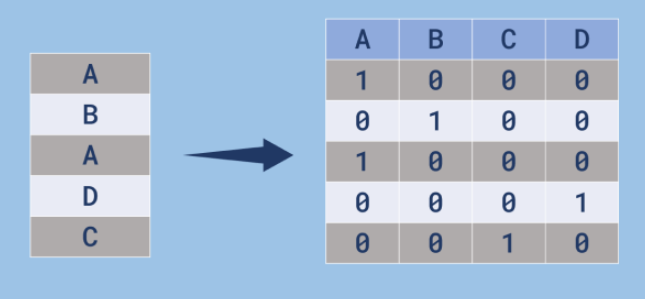

In [206]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [207]:
columnas=X.columns

In [208]:
one_hot=make_column_transformer((OneHotEncoder(drop="if_binary"),
                                ["estado_civil","escolaridad","default","prestatario"]),
                               remainder='passthrough',
                               sparse_threshold=0,
                               force_int_remainder_cols=False)

In [209]:
X=one_hot.fit_transform(X)

In [210]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_soltero (a)',
       'onehotencoder__escolaridad_primaria',
       'onehotencoder__escolaridad_secundaria',
       'onehotencoder__escolaridad_superior', 'onehotencoder__default_si',
       'onehotencoder__prestatario_si', 'remainder__edad',
       'remainder__saldo', 'remainder__ultimo_contacto',
       'remainder__ct_contactos'], dtype=object)

In [211]:
#Si visualizo por si sola la X, me muestra lo siguiente y no entiendo que es. Para saber de que se trata se hace lo sig.
X

array([[ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.420e+02,  5.870e+02,
         1.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  1.289e+03,  2.500e+02,
         4.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  3.630e+02,  1.600e+01,
         1.800e+01],
       ...,
       [ 0.000e+00,  0.000e+00,  1.000e+00, ..., -4.770e+02,  1.532e+03,
         2.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.187e+03,  5.250e+02,
         3.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  1.900e+01,  1.100e+02,
         2.000e+00]])

In [212]:
pd.DataFrame(X,columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_soltero (a),onehotencoder__escolaridad_primaria,onehotencoder__escolaridad_secundaria,onehotencoder__escolaridad_superior,onehotencoder__default_si,onehotencoder__prestatario_si,remainder__edad,remainder__saldo,remainder__ultimo_contacto,remainder__ct_contactos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


## Transformando la variable respuesta

Así como las variables explicativas, la variable objetivo también debe convertirse al formato numérico. Podemos representar una variable objetivo binaria como 0 o 1, donde 0 indica la ausencia de la característica de la variable y 1 representa su presencia.

In [213]:
from sklearn.preprocessing import LabelEncoder

In [214]:
label_encoder = LabelEncoder()

In [215]:
y=label_encoder.fit_transform(y)


In [216]:
y

array([1, 1, 0, ..., 1, 1, 1])

# 3 Ajustando modelos

## Dividiendo los datos entre entrenamiento y prueba

Para comprender si el modelo realmente está aprendiendo de los datos, necesitamos hacer una separación de los datos entre entrenamiento y prueba. Los datos de **entrenamiento** se utilizan para ajustar el modelo, mientras que los datos de **prueba** sirven para verificar el aprendizaje del modelo en datos que no fueron utilizados en el momento del ajuste.

<a href="https://ibb.co/2749Chh3"><img src="https://i.ibb.co/Y7sC1QQB/train-test.png" alt="train-test" border="0"></a>

In [217]:
from sklearn.model_selection import train_test_split

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=5)

## Modelo de referencia - Baseline

El modelo más simple de clasificar los datos es simplemente utilizar un algoritmo que asigna todas las clasificaciones a la clase que tiene mayor frecuencia. Este algoritmo sirve como un criterio de comparación para identificar si los otros modelos tienen un rendimiento mejor que la clasificación más simple posible.

In [219]:
from sklearn.dummy import DummyClassifier

In [220]:
#usando dummyclassifier, la puntuacion obtenida fue del 60%
dummy= DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test,y_test)

0.6025236593059937

## Árboles de Decisión

El modelo de árbol de decisión es muy utilizado debido a su alta **explicabilidad** y **procesamiento rápido**, manteniendo un rendimiento bastante interesante.

Se basa en decisiones simples tomadas por el algoritmo, separando los datos mediante comparaciones de **menor** y **mayor** en los valores de las columnas de la base de datos.

In [221]:
from sklearn.tree import DecisionTreeClassifier

In [222]:
modelo_arbol= DecisionTreeClassifier()
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier()

In [223]:
#usando el arbol, la puntuacion(score) aumentó a 69%
modelo_arbol.score(X_test,y_test)

0.6593059936908517

In [224]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

```python
valores_columnas = ['casado (a)',
                'divorciado (a)',
                'soltero (a)',
                'primaria',
                'secundaria',
                'superior',
                'default',
                'prestatario',
                'edad',
                'saldo',
                'ultimo_contacto',
                'ct_contactos']
```

In [225]:
valores_columnas = ['casado (a)',
                'divorciado (a)',
                'soltero (a)',
                'primaria',
                'secundaria',
                'superior',
                'default',
                'prestatario',
                'edad',
                'saldo',
                'ultimo_contacto',
                'ct_contactos']

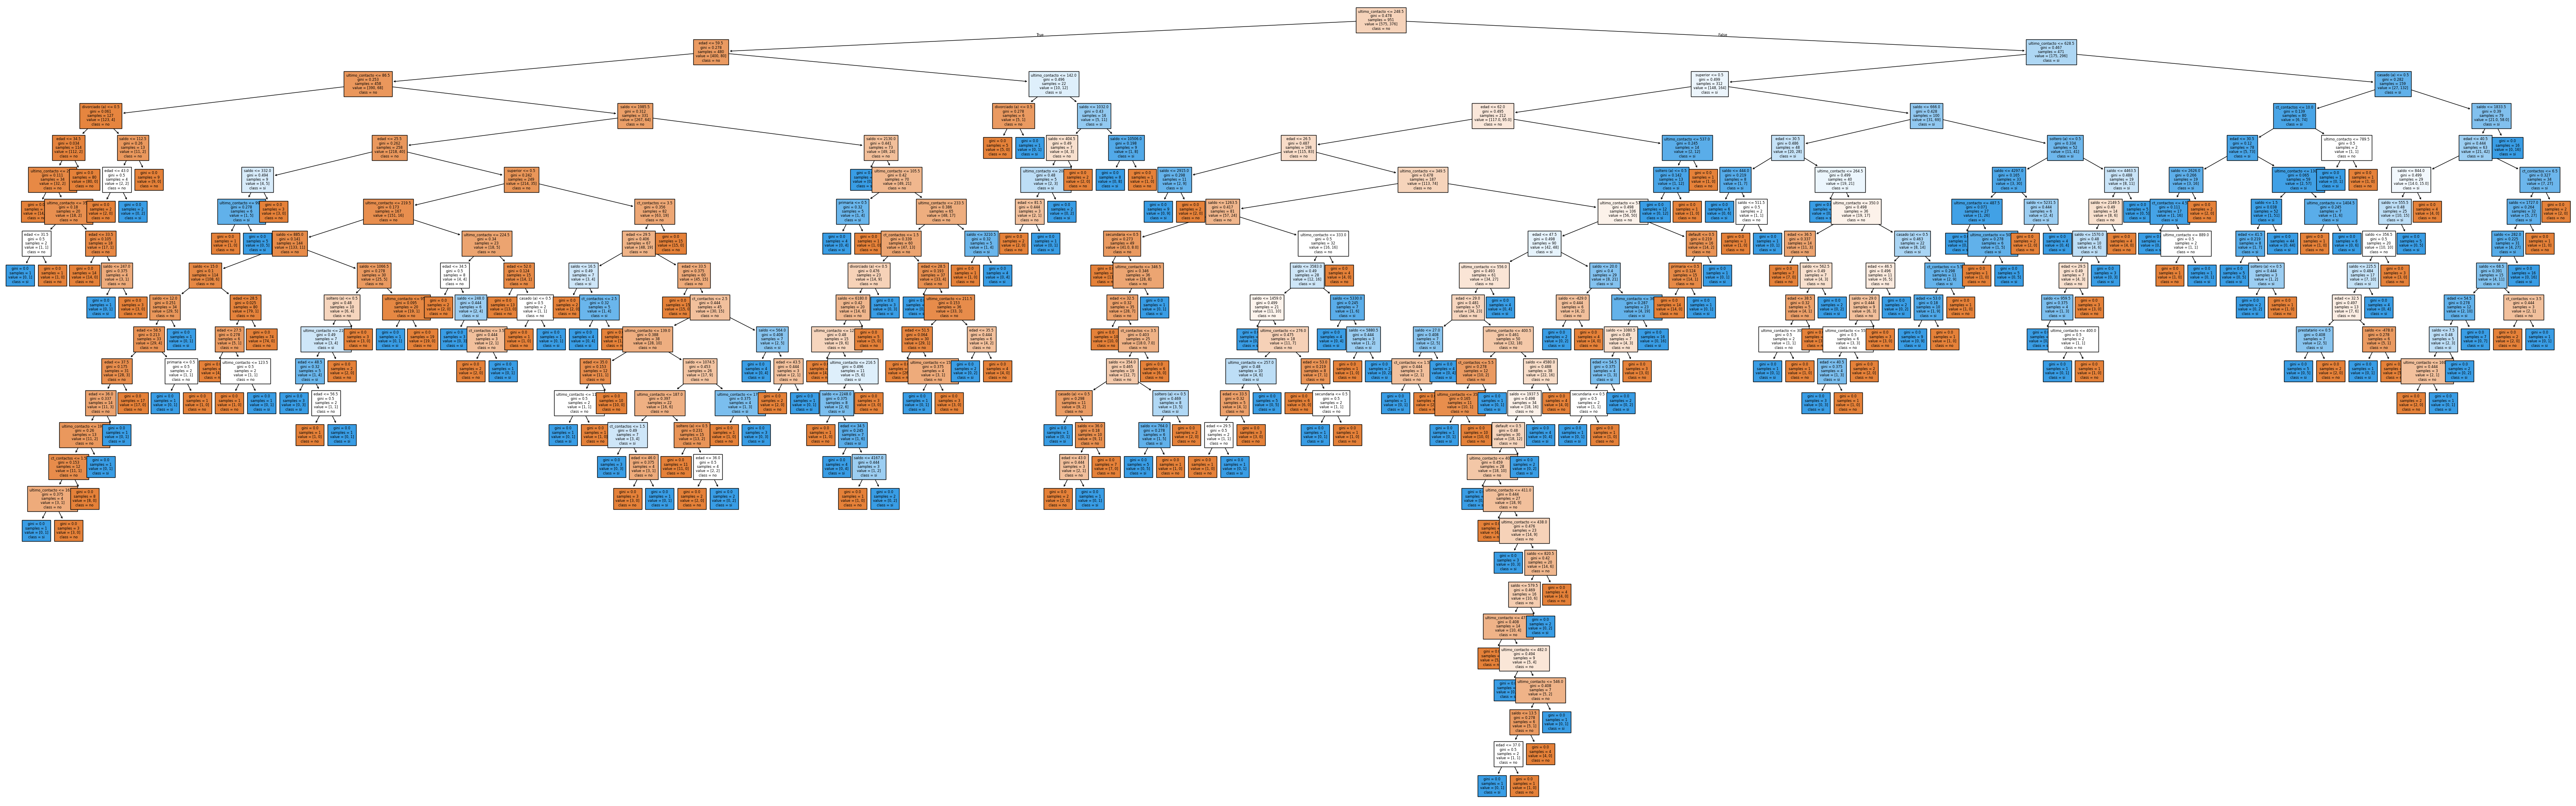

In [226]:
plt.figure(figsize=(80,25))
plot_tree(modelo_arbol, filled=True,class_names=["no","si"],fontsize=6,feature_names=valores_columnas);


In [227]:
#esto significa que el modelo de clasificacion del arbol se entrenó perfectamente con un 100%
modelo_arbol.score(X_train,y_train)

1.0

In [228]:
modelo_arbol= DecisionTreeClassifier(max_depth=3,random_state=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [229]:
modelo_arbol.score(X_test,y_test)

0.7160883280757098

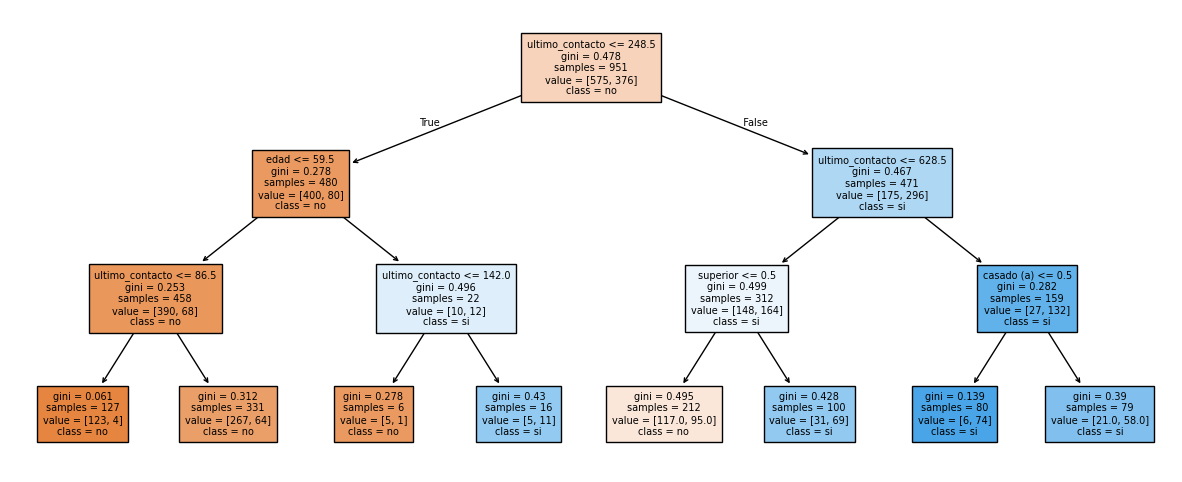

In [230]:
plt.figure(figsize=(15,6))
plot_tree(modelo_arbol, filled=True,class_names=["no","si"],fontsize=7,feature_names=valores_columnas);


In [231]:
modelo_arbol.score(X_train,y_train)

0.7613038906414301

# 4. Selección de modelos

## Normalizando los datos

Algunos algoritmos pueden asignar un mayor peso a los valores de las variables debido a la escala de los valores y no por la importancia de la clasificación de la variable objetivo. Por ejemplo, en una base de datos con las columnas **edad** y **salario**, el algoritmo puede dar un mayor peso de decisión a los valores del salario simplemente por estar en una escala mayor que los valores de la edad, y no porque la variable salario sea más importante que la variable edad.

En estos casos, necesitamos realizar una transformación en los datos para que estén en una misma escala, evitando que el algoritmo sea influenciado incorrectamente por los valores numéricos divergentes entre las variables.

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [232]:
from sklearn.preprocessing import MinMaxScaler

In [233]:
normalizacion= MinMaxScaler()
X_train_normalizado=normalizacion.fit_transform(X_train)


In [234]:
pd.DataFrame(X_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.065564,0.123734,0.032258
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147059,0.045792,0.396527,0.032258
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.076036,0.335022,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.573529,0.062866,0.315123,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.148380,0.065847,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.191176,0.044265,0.246382,0.129032
947,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.205882,0.028043,0.275687,0.032258
948,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.323529,0.042952,0.024964,0.129032
949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.176471,0.042810,0.023878,0.000000


## KNN

El algoritmo KNN se basa en el cálculo de la distancia entre los registros de la base de datos y busca elementos que estén cerca unos de otros (vecinos) para tomar la decisión de clasificación.

Debido a que utiliza cálculos de distancia, este algoritmo está influenciado por la escala de las variables, y por eso es necesario realizar una transformación en los datos antes de utilizar este método.

In [235]:
from sklearn.neighbors import KNeighborsClassifier

In [236]:
knn=KNeighborsClassifier()


In [237]:
knn.fit(X_train_normalizado,y_train)

KNeighborsClassifier()

In [238]:
X_test_normalizado=normalizacion.transform(X_test)

In [239]:
knn.score(X_test_normalizado,y_test)

0.6876971608832808

## Escogiendo y serializando el mejor modelo

Al final de un proyecto de machine learning, debemos comparar los resultados de los modelos y elegir el que tenga el mejor rendimiento.

Podemos almacenar el modelo en un archivo serializado del tipo pickle para que sea utilizado en producción, es decir, en datos del mundo real para atender las necesidades del problema que necesita ser resuelto.

```python
nuevo_dato = {
    'edad': [45],
    'estado_civil':['soltero (a)'],
    'escolaridad':['superior'],
    'default': ['no'],
    'saldo': [23040],
    'prestatario': ['no'],
    'ultimo_contacto': [800],
    'ct_contactos': [4]
}
```

#**DESAFIO PRACTICO**

Vamos a practicar lo que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente al presentado en la clase. El tema de la base de datos es la de churn de clientes. El churn es una métrica que indica a los clientes que cancelan el servicio en un determinado período de tiempo.

Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario, que se realizará a lo largo de las clases del curso.

**1 -** La primera etapa en un proyecto de Machine Learning es la obtención de datos. A partir de esta obtención, podemos leer los datos para construir un modelo. Como tarea inicial, realiza la lectura de la base de datos y verifica la presencia de datos nulos. Además, elimina la columna 'id_cliente', ya que este tipo de información única para cada fila no es útil para su uso en modelos de machine learning.

**2 -** Después de leer los datos, es importante conocer los datos, revisando inconsistencias y entendiendo el comportamiento de cada una de las columnas. En esta tarea, realiza un análisis exploratorio utilizando gráficos para las variables categóricas de la base de datos, incluyendo la variable objetivo churn. Para estas variables, se pueden utilizar gráficos de barras para contar las categorías y hacer un agrupamiento por colores de acuerdo con las categorías de la variable objetivo.

**3 -** Después de explorar las variables categóricas, es el turno de las variables numéricas. Construye gráficos de distribución como boxplots o histogramas para analizar el comportamiento de los valores numéricos y verificar si hay valores inconsistentes.

Recuerda que la práctica es fundamental para mejorar tus habilidades en Machine Learning. Con cada actividad, estarás un paso más cerca de dominar este campo de la tecnología. Utiliza los recursos disponibles, colabora con tus compañeros y no tengas miedo de cometer errores. Después de todo, es con los desafíos que crecemos.



In [149]:
import pandas as pd

In [150]:
datos = pd.read_csv('/content/churn.csv')
datos = datos.drop('id_cliente', axis=1)
datos

,score_credito,pais,sexo_biologico,edad,años_de_cliente,saldo,servicios_adquiridos,tiene_tarjeta_credito,miembro_activo,salario_estimado,churn
0,619,Francia,Mujer,42,2,0.00,1,1,1,101348.88,1
1,608,España,Mujer,41,1,83807.86,1,0,1,112542.58,0
2,502,Francia,Mujer,42,8,159660.80,3,1,0,113931.57,1
3,699,Francia,Mujer,39,1,0.00,2,0,0,93826.63,0
4,850,España,Mujer,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Francia,Hombre,39,5,0.00,2,1,0,96270.64,0
9996,516,Francia,Hombre,35,10,57369.61,1,1,1,101699.77,0
9997,709,Francia,Mujer,36,7,0.00,1,0,1,42085.58,1
9998,772,Alemania,Hombre,42,3,75075.31,2,1,0,92888.52,1


In [151]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   score_credito          10000 non-null  int64  
 1   pais                   10000 non-null  object 
 2   sexo_biologico         10000 non-null  object 
 3   edad                   10000 non-null  int64  
 4   años_de_cliente        10000 non-null  int64  
 5   saldo                  10000 non-null  float64
 6   servicios_adquiridos   10000 non-null  int64  
 7   tiene_tarjeta_credito  10000 non-null  int64  
 8   miembro_activo         10000 non-null  int64  
 9   salario_estimado       10000 non-null  float64
 10  churn                  10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Podemos identificar que la base de datos tiene 10,000 registros y que en cada una de las columnas hay 10,000 registros no nulos. Esto es un buen indicativo de que nuestra base de datos no necesitará ningún tratamiento en ese sentido.

**2 -** Para realizar el análisis exploratorio, primero necesitamos identificar cuáles son las variables numéricas y cuáles son las categóricas, y también identificar la variable objetivo. Las variables categóricas son aquellas que presentan categorías distintas, generalmente en formato de texto.

La base de datos tiene 5 columnas categóricas, que son:  **pais, sexo_biologico, tiene_tarjeta_credito, miembro_activo y churn**,siendo esta última la variable objetivo. Las demás son columnas con datos numéricos.

Vamos a utilizar gráficos de barras para contar cada categoría para cada una de las columnas usando la biblioteca **plotly**, comenzando con **la variable objetivo churn**. Primero es necesario importar la biblioteca y luego usar la función histogram para generar el gráfico:

In [152]:
import plotly.express as px

In [153]:
px.histogram(datos, x= 'churn', text_auto = True)

Los demás gráficos de las variables categóricas pueden ser creados con una diferenciación de color para cada categoría de churn, podemos usar los parámetros color = 'churn' y barmode = 'group' para realizar esta tarea.

Gráfico de la columna país:

In [154]:
px.histogram(datos, x = 'pais', text_auto = True, color = 'churn', barmode = 'group')

In [155]:
px.histogram(datos, x = 'sexo_biologico', text_auto = True, color = 'churn', barmode = 'group')

In [156]:
px.histogram(datos, x = 'tiene_tarjeta_credito', text_auto = True, color = 'churn', barmode = 'group')

In [157]:
px.histogram(datos, x = 'miembro_activo', text_auto = True, color = 'churn', barmode = 'group')

3 - El resto del análisis exploratorio se realizará con las 6 columnas numéricas: score_credito, edad, años_de_cliente, saldo, servicios_adquiridos y salario_estimado. Podemos utilizar el boxplot para generar los gráficos de distribución de estas variables con la función box, usando el parámetro color = 'churn' para dividir por color según las categorías de la variable objetivo.

Gráfico de la columna score_credito:

In [158]:
px.box(datos, x = 'score_credito', color = 'churn')

In [159]:
px.box(datos, x = 'edad', color = 'churn')

In [160]:
px.box(datos, x = 'años_de_cliente', color = 'churn')

In [161]:
px.box(datos, x = 'saldo', color = 'churn')

In [162]:
px.box(datos, x = 'servicios_adquiridos', color = 'churn')

In [163]:
px.box(datos, x = 'salario_estimado', color = 'churn')

La solución para cualquier desafío comienza con la exploración y la comprensión del problema. Dedica un tiempo a analizar y explorar esta situación nuevamente. Además, busca ayuda siempre que sea necesario. La colaboración con compañeros en la comunidad y la participación en el colectivo puede proporcionarte valiosos conocimientos.

##**segunda parte del desafio**

1 - Para hacer la separación de los datos entre variables explicativas y variable objetivo, necesitamos detectar cuáles columnas formarán parte de cada uno de estos conjuntos de datos. La variable objetivo es la columna churn. Las variables explicativas son las demás columnas, que explicarán el comportamiento de la variable objetivo.

Para almacenar la columna churn en y, podemos usar la selección de columnas de la biblioteca pandas. Lo mismo se puede hacer para seleccionar las columnas en x, sin embargo, de forma más simple, podemos usar el método drop para eliminar la columna churn y almacenar todo lo demás en x:

In [164]:
x = datos.drop('churn', axis = 1)
y = datos['churn']

¡Listo! Ahora tenemos la separación de las variables para indicar al modelo cuál es la respuesta y cuáles son las columnas que explican esa respuesta.

2 - Para realizar la transformación de las variables categóricas, primero necesitamos identificar cuáles son las columnas que requieren este tipo de transformación.

En la base de datos de churn, las columnas categóricas son:

**pais: 3 categorías**

**sexo_biologico: 2 categorías**

**tiene_tarjeta_credito: 2 categorías**

**miembro_activo: 2 categorías**

La columna país necesita pasar por una transformación para que al final se generen 3 columnas, una para cada país distinto. Cada columna indicará con 0 si el registro no es del respectivo país y 1 si lo es. Como las demás columnas solo necesitan cambiar los valores de las dos categorías a 0 y 1, podemos usar el parámetro drop = 'if_binary' para que al final del proceso se elimine una de las columnas generadas y se mantenga solo una.

Vamos a importar las funciones y usar el método make_column_transformer para indicar cuáles son las columnas que necesitan el tratamiento de datos y cuáles no:

In [165]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [166]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['sexo_biologico','pais', 'tiene_tarjeta_credito', 'miembro_activo']
),
    remainder = 'passthrough',
    sparse_threshold=0)

Para visualizar mejor los datos transformados, podemos almacenar el nombre de las columnas originales para obtener el nombre de las columnas después de la transformación. Luego de esto, usaremos el método fit_transform para realizar la transformación y visualizar los datos en un DataFrame:

In [167]:
columnas = x.columns

In [168]:
x = one_hot.fit_transform(x)

In [169]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__sexo_biologico_Mujer',
       'onehotencoder__pais_Alemania', 'onehotencoder__pais_España',
       'onehotencoder__pais_Francia',
       'onehotencoder__tiene_tarjeta_credito_1',
       'onehotencoder__miembro_activo_1', 'remainder__score_credito',
       'remainder__edad', 'remainder__años_de_cliente',
       'remainder__saldo', 'remainder__servicios_adquiridos',
       'remainder__salario_estimado'], dtype=object)

In [170]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(columnas))

,onehotencoder__sexo_biologico_Mujer,onehotencoder__pais_Alemania,onehotencoder__pais_España,onehotencoder__pais_Francia,onehotencoder__tiene_tarjeta_credito_1,onehotencoder__miembro_activo_1,remainder__score_credito,remainder__edad,remainder__años_de_cliente,remainder__saldo,remainder__servicios_adquiridos,remainder__salario_estimado
0,1.0,0.0,0.0,1.0,1.0,1.0,619.0,42.0,2.0,0.00,1.0,101348.88
1,1.0,0.0,1.0,0.0,0.0,1.0,608.0,41.0,1.0,83807.86,1.0,112542.58
2,1.0,0.0,0.0,1.0,1.0,0.0,502.0,42.0,8.0,159660.80,3.0,113931.57
3,1.0,0.0,0.0,1.0,0.0,0.0,699.0,39.0,1.0,0.00,2.0,93826.63
4,1.0,0.0,1.0,0.0,1.0,1.0,850.0,43.0,2.0,125510.82,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,1.0,1.0,0.0,771.0,39.0,5.0,0.00,2.0,96270.64
9996,0.0,0.0,0.0,1.0,1.0,1.0,516.0,35.0,10.0,57369.61,1.0,101699.77
9997,1.0,0.0,0.0,1.0,0.0,1.0,709.0,36.0,7.0,0.00,1.0,42085.58
9998,0.0,1.0,0.0,0.0,1.0,0.0,772.0,42.0,3.0,75075.31,2.0,92888.52


3 - Después de transformar las variables explicativas, queda transformar la variable objetivo. Vamos a utilizar el LabelEncoder, que es el método recomendado para esta tarea. El proceso para utilizar este método es bastante simple. Primero tenemos que importar la función, luego inicializar en una variable y, por último, usar el método fit_transform en los datos y:

In [171]:
from sklearn.preprocessing import LabelEncoder

In [172]:
label_encoder = LabelEncoder()

In [173]:
y = label_encoder.fit_transform(y)

In [174]:
y

array([1, 0, 1, ..., 1, 1, 0])

Resolver desafíos y encontrar soluciones es una parte fundamental de cualquier viaje de aprendizaje, especialmente en Machine Learning. La solución a cualquier desafío comienza con el análisis y la acción exploratoria del problema. Por lo tanto, sigue avanzando y aprovecha cada desafío como una oportunidad para desarrollar tus habilidades en análisis de datos.

##**tercera parte del desafio**

1 - Para separar el conjunto de datos entre entrenamiento y prueba, necesitamos utilizar el método train_test_split de la biblioteca Scikit-Learn. Primero, vamos a importar la función con el código:

In [175]:
from sklearn.model_selection import train_test_split

Ahora, vamos a utilizar el método usando el parámetro stratify = y para mantener la proporción de los datos de la variable objetivo en los dos conjuntos:

In [176]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y,  random_state = 5)

2 - Con los datos separados entre entrenamiento y prueba, podemos generar el modelo base con el DummyClassifier a partir de los datos de entrenamiento. Primero, vamos a importar la función:

In [177]:
from sklearn.dummy import DummyClassifier

Ahora vamos a inicializar el modelo y hacer el ajuste con los datos de entrenamiento. Por último, podemos usar el método score para evaluar el desempeño:

In [178]:
dummy = DummyClassifier()
dummy.fit(x_train, y_train)

dummy.score(x_test, y_test)

0.7964

3 - Para construir un modelo de árbol de decisión, necesitamos los mismos pasos que el modelo base. Debemos importar la función, inicializar el modelo, hacer el ajuste del modelo en los datos de entrenamiento y, por último, evaluar el desempeño en los datos de prueba. Vamos entonces a cada una de estas tareas, utilizando el max_depth=4 al momento de inicializar el modelo:

In [179]:
from sklearn.tree import DecisionTreeClassifier

In [180]:
arbol = DecisionTreeClassifier(max_depth = 4, random_state =5)
arbol.fit(x_train, y_train)

arbol.score(x_test, y_test)

0.8464

Ahora, para visualizar las elecciones del árbol de decisión, vamos a usar el método plot_tree y vamos a importar matplotlib para cambiar el tamaño de la figura:

In [181]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

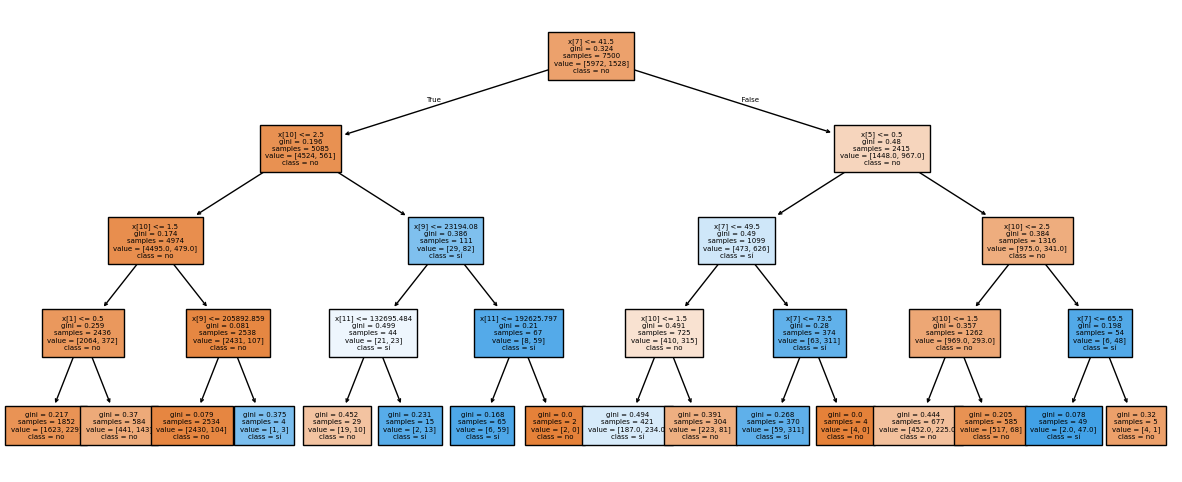

In [182]:
plt.figure(figsize = (15, 6))
plot_tree(arbol, filled = True, class_names = ['no', 'sí'], fontsize = 5);

Valora tus etapas y resultados a medida que avanzas en las actividades. Cada proceso es parte crucial de tu aprendizaje. Además, siempre que sea posible, cultiva tu curiosidad y explora el enfoque mencionado anteriormente. Aprovecha cada paso de esta jornada y reconoce en cada desafío una oportunidad para mejorar tu conocimiento en Machine Learning de forma exponencial.